<a href="https://colab.research.google.com/github/Oscarcasas92/SVM-analisis-de-cancer/blob/master/Redes_y_SVM_proyecto_Base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias 
A continuacion se presenta el conjunto de librerias que se usaran en el desarollo del proyecto

In [0]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Conjunto de datos
### Breast Cancer Wisconsin (Diagnostic) Data Set
La base de datos Breast Cancer Wisconsin (Diagnostic)  contiene un conjunto de características las cuales fueron obtenidas a partir de una imagen digitalizada, de un aspirado con aguja fina (FNA) de una masa mamaria. Este conjunto de parametros describe los núcleos celulares presentes en las imagen. 

### Descripcion de los datos
Las caracteristicas calculadas para cada imagen fueron las siguientes:

1. radio (media de distancias desde el centro a puntos en el 2. perímetro)
3. textura (desviación estándar de valores de escala de grises)
4. perímetro
5. Area
6. suavidad (variación local en longitudes de radio)
7. compacidad (perímetro ^ 2 / área - 1.0)
8. concavidad (severidad de las porciones cóncavas del contorno)
9. puntos cóncavos (número de porciones cóncavas del contorno)
10. simetría
dimensión fractal ("aproximación de la costa" - 1)

Para cada uno de estos parametros, en las imagenes se calculo: la media, el error estándar y el "peor"(media de los tres valores más grandes). Con esto se obtuvo un conjunto final de 30 características. 

La distribucion de las clases esta dada de la siguiente manera: 357 benignas y 212 malignas, para un total de 569 imagenes analizadas.

Leemos los datos como sigue

In [0]:
# load the dataset
dataset = loadtxt('data1.csv', delimiter=',', skiprows=1)
# split into input (X) and output (y) variables
X = dataset[:,1:31]
Y = dataset[:,0]
Xtr, Xts, ytr, yts = train_test_split(X, Y, test_size = 0.20)


# Grafica de conjunto de datos
A continuacion se muestra el conjunto de datos graficado, donde los puntos Rojos correponden a la clasificacion de Cancer Maligno y los puntos Azules corresponden a la Clasificacion de Cancer Benigno

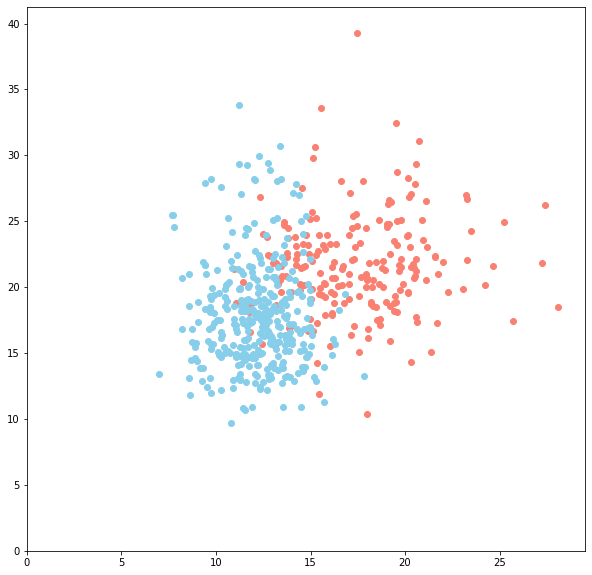

In [78]:
# Resolución del mapa de predicción.
res = 100 

# Coordendadas del mapa de predicción.
_x0 = np.linspace(0, 0, res)
_x1 = np.linspace(0, 0, res)

# Input con cada combo de coordenadas del mapa de predicción.
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Objeto vacio a 0.5 del mapa de predicción.
_pY = np.zeros((res, res)) + 0.5

# Visualización del mapa de predicción.
plt.figure(figsize=(10, 10))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)


#Visualización de la nube de datos.
plt.scatter(X[Y == 0,0], X[Y == 0,1], c="Salmon")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="skyblue")

#plt.tick_params(labelbottom=False, labelleft=False)

# Implementacion de Red Neuronal

A continuacion se utiliza la liberia de Keras Sequential. La cual nos permite crear un modelo secuencial, a partir de la creacion de una pila de capas de manera secuancial. 

Se define ademas la topologia de esta red, la cual tendra  2 capas dendad la primera con 12 neuronas y la siguiente con 8. A la salida se presenta una capa con una reurona debiado a que el tipo de clasificacion qeu se hara sobre los datos correponde a una salida binaria




In [0]:
lr = 0.01          # learning rate
nn = [12, 8, 1]  # número de neuronas por capa.

# Creamos el objeto que contendrá a nuestra red neuronal, como una secuencia de capas.
model = Sequential()

# Añadimos la capa 1
l1 = model.add(Dense(nn[0], input_dim=30, activation='relu'))

# Añadimos la capa 2
l2 = model.add(Dense(nn[1], activation='relu'))

# Añadimos la capa 3
l3 = model.add(Dense(nn[2], activation='sigmoid'))

A continuación compilamos el modelo, definiendo la función de perdida y el optimizador.

In [80]:
# Compilamos el modelo, definiendo la función de perdida y el optimizador.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamos al modelo con los datos 
model.fit(Xtr, ytr, epochs=150)

#model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
455/455 [==============================] - 0s 251us/step - loss: 174.6653 - accuracy: 0.6242
Epoch 2/150
455/455 [==============================] - 0s 46us/step - loss: 128.8484 - accuracy: 0.6242
Epoch 3/150
455/455 [==============================] - 0s 49us/step - loss: 76.7794 - accuracy: 0.6242
Epoch 4/150
455/455 [==============================] - 0s 48us/step - loss: 24.9046 - accuracy: 0.6154
Epoch 5/150
455/455 [==============================] - 0s 43us/step - loss: 8.1672 - accuracy: 0.3758
Epoch 6/150
455/455 [==============================] - 0s 46us/step - loss: 2.9965 - accuracy: 0.4989
Epoch 7/150
455/455 [==============================] - 0s 46us/step - loss: 1.5422 - accuracy: 0.4396
Epoch 8/150
455/455 [==============================] - 0s 55us/step - loss: 1.2158 - accuracy: 0.4945
Epoch 9/150
455/455 [==============================] - 0s 52us/step - loss: 0.9845 - accuracy: 0.5934
Epoch 10/150
455/455 [==============================] - 0s 57us/step - loss

Finalmente evaluamos nuestro modelo con los datos de validacion obteniendo asi de esta manera un Accuracy de 94.74

In [81]:
# evaluate the keras model
_, accuracy = model.evaluate(Xts, yts)
print('Accuracy: %.2f' % (accuracy*100))

114/114 [==============================] - 0s 181us/step
Accuracy: 93.86


In [82]:
row1 = Xtr.shape[0]   #number of samples for train
row = Xts.shape[0]    #number of samples for test
print(row1);print(row)

455
114


In [83]:
predictions = model.predict_classes(Xts)
#the following loop will show all the predictions made over the 114 test values taken at the beginning.
for i in range(row):
	print('%s => %d (expected %d)' % (Xts[i].tolist(), predictions[i], yts[i]))

[12.18, 20.52, 77.22, 458.7, 0.08013, 0.04038, 0.02383, 0.0177, 0.1739, 0.05677, 0.1924, 1.571, 1.183, 14.68, 0.00508, 0.006098, 0.01069, 0.006797, 0.01447, 0.001532, 13.34, 32.84, 84.58, 547.8, 0.1123, 0.08862, 0.1145, 0.07431, 0.2694, 0.06878] => 1 (expected 1)
[13.77, 13.27, 88.06, 582.7, 0.09198, 0.06221, 0.01063, 0.01917, 0.1592, 0.05912, 0.2191, 0.6946, 1.479, 17.74, 0.004348, 0.008153, 0.004272, 0.006829, 0.02154, 0.001802, 14.67, 16.93, 94.17, 661.1, 0.117, 0.1072, 0.03732, 0.05802, 0.2823, 0.06794] => 1 (expected 1)
[11.13, 16.62, 70.47, 381.1, 0.08151, 0.03834, 0.01369, 0.0137, 0.1511, 0.06148, 0.1415, 0.9671, 0.968, 9.704, 0.005883, 0.006263, 0.009398, 0.006189, 0.02009, 0.002377, 11.68, 20.29, 74.35, 421.1, 0.103, 0.06219, 0.0458, 0.04044, 0.2383, 0.07083] => 1 (expected 1)
[13.17, 18.66, 85.98, 534.6, 0.1158, 0.1231, 0.1226, 0.0734, 0.2128, 0.06777, 0.2871, 0.8937, 1.897, 24.25, 0.006532, 0.02336, 0.02905, 0.01215, 0.01743, 0.003643, 15.67, 27.95, 102.8, 759.4, 0.1786, 0.4

# Implementacion de SVM (Support Vector Machine)

# Librerias 
A continuacion se presenta el conjunto de librerias que se usaran en el desarollo del proyecto

In [0]:
import pandas as pd
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as qda
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
#https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
data1 = pd.read_csv('data1.csv',sep=',')
data1.head()

X1 = data1.drop('diagnosis', axis=1) #Datos de x no mas
y1 = data1['diagnosis'] #Datos de y


Xtr, Xts, ytr, y1ts = train_test_split(X1, y1, test_size = 0.20) #Datos de entrenamiento
data1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [71]:
#Linear Kernel
svclassifier = SVC(kernel='linear')
svclassifier.fit(Xtr, ytr) #
y_pred = svclassifier.predict(Xts) #Predecir los nuevos x
print(confusion_matrix(yts,y_pred))
print(classification_report(yts,y_pred))

#Polinomial Kernel
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(Xtr, ytr)
y_pred = svclassifier.predict(Xts)
print(confusion_matrix(yts,y_pred))
print(classification_report(yts,y_pred))

#Gaussian Kernel
svclassifier = SVC(kernel='rbf')
svclassifier.fit(Xtr, ytr)
y_pred = svclassifier.predict(Xts)
print(confusion_matrix(yts,y_pred))
print(classification_report(yts,y_pred))

#Sigmoid Kernel
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(Xtr, ytr)
y_pred = svclassifier.predict(Xts)
print(confusion_matrix(yts,y_pred))
print(classification_report(yts,y_pred))

[[30  1]
 [ 1 82]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.99      0.99      0.99        83

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

[[25  6]
 [ 1 82]]
              precision    recall  f1-score   support

           0       0.96      0.81      0.88        31
           1       0.93      0.99      0.96        83

    accuracy                           0.94       114
   macro avg       0.95      0.90      0.92       114
weighted avg       0.94      0.94      0.94       114

[[27  4]
 [ 3 80]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.89        31
           1       0.95      0.96      0.96        83

    accuracy                           0.94       114
   macro avg       0.93      0.92      0.92       114
weighted avg     

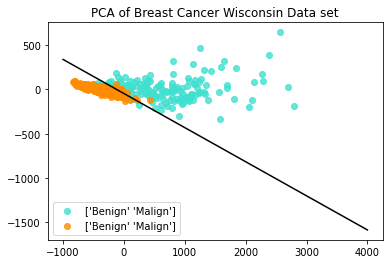

In [72]:
#Reducimos dimensionalidad de los datos ya que con kernel se amplio esa dimension
pca = PCA(n_components=2)
Xr1 = pca.fit(Xtr).transform(Xtr)

plt.figure()
colors = ['turquoise', 'darkorange']
lw = 1
target_names = np.array(['Benign','Malign'],dtype='<U10')
for color, i, target_name in zip(colors, [0,1], target_names):
    plt.scatter(Xr1[ytr == i, 0], Xr1[ytr == i, 1], color=color, alpha=.8, lw=lw,
                label=target_names)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Breast Cancer Wisconsin Data set')

#After PCA for dimensional reduction

C = 1.0  # SVM regularization parameter
clf = svm.SVC(kernel = 'linear',  gamma=0.7, C=C )
clf.fit(Xr1, ytr)

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-1000, 4000)
yy = a * xx - (clf.intercept_[0]) / w[1]

plt.plot(xx, yy, 'k-')
plt.show()

In [0]:
from sklearn.svm import SVR
svr=SVR(kernel='linear', C=1.0, epsilon=0.2)
svr.fit(Xtr, ytr)
pred_y=svr.predict(Xts)